# **Polynomial Regression**
In order to fit a continuous data set is the final tool that we need to acquire. In behaviorial cloning we are going to need to train a model that can predict steering angles based on a continuous spectrum. But before we dive into deep waters we will transition into behavioral cloning by first learning how to fit a model into a 2D continus  dataset.

We looked at classification whoes sole purpose is to group the output into some class, let's now very briefly look at a regression type example linear regression which is used to pridict continous values based on a line which best models the relationship between the independent X and the dependent variable y the line which best fits a series of points in other words linear regression helps to predit values on a continuous spectrum rather than discrete classes. Linear regression is the simplest form of regression. The goal is to find the line parameterized by some set of slope and y (y = mx + b) intercept parameters which provide the best fit to our training data with the train network it can now produce one output which is the prediction for the unlabelled test input. However how would we train a NN to perform a linear regression? well it does by minimizing the loss over our data sets which would correspond to the mean squared error.

We will better understand the process of creating a network for a regression type example by actually going ahead and implementing it in Keras.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


Let us first setup non-linear data by declaring the number of points which will equal 500, then we will setup the training data's x coordinates to be between a specific range, so we set x is equal to np.linspace() which returns evenly spaced numbers over a specified interval. The interval will be from -3 up +3 and then the 3rd arg we specify the number of points in the interval.
Notice, this data forms a simple sinusoidal curve, this curve is obtained by setting each vertical value Y is equal to the sign of the correcponding X value. Simply enough Y=sin(x). So it will do just. Now lets plot our data by plt.scatter(). and you will get a sin graph.
Let's add some noise to our data so that each point in this curve can deviate from its standard shape, by adding variances simply challenges are NN making it more difficult for it to learn. To add this variance we have a stats for every point it a vertical value y is going to vertically shift in a range of -0.5 up until 0.5 units from the curve to do this for every y value, we add:
y = np.sin(X) + np.random.uniform(-0.5. 0.5, points)
for all of our points, such that every point in y value based on whatever random number it is added to, that is between -0.5 and 0.5 vertical range and to ensure vertical results let's not forgot to seed our number generator with np.random.seed().

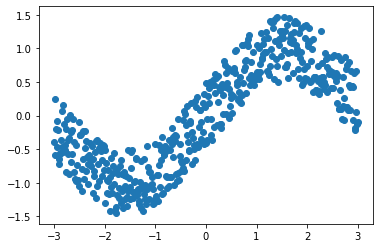

In [0]:
np.random.seed()
points = 500
X = np.linspace(-3, 3, points)
y = np.sin(X) + np.random.uniform(-0.5, 0.5, points)

plt.scatter(X, y)

We now train a NN to come up with a model that fits this data. Clearly this cannot be fixed by a simple preceptron based model so require the use of some hidden layers to obtain a model to fit this non-linear dataset. 
So like always we define our NN model by setting it equal to sequential. Then add a hidden layer to our model by adding a Dense layer, we will make use of 50 nodes in the hidden layer and since this is our first layer we have to specify the input nodes (input_dim), So how many input nodes should we have? Since we are dealing with a regression type example only one, and the activation will be sigmoid.
We will have another set of nodes that a hidden layer with model.add(Dense()) with 30 nodes produced optimal results in this hidden layers with activation function sigmoid
now as for the output layer we will add Dense layer and what we are trying to predict is the response variable y which would correspond to a single output node one.
Once again we make use of the Adam optimizer with initial learning rates equal to 0.01

we compile our model with the loss function of mean square error.
What does a mean square error? 
Suppose we had a bunch of values so we start by drawing some regression line parameterized by a random set of weights. to measure how well this model fits, we calculate the standard error of the estimate, the mean squared error. the standard error of the estimate is a measure of the accuracy of the models prediction. These data points show the actual values the actual labels of a given input wereas the regression line shows the estimate value for each actual value there is a corresponding estimated value predicted by the linear model. the error in this case corresponds to how far the actual value is from the estimated value, the vertical distance between them so the error is pretty much obtained by comparing the estimated values with the actual values for all points. So mean squared is attained with the following formula:

MSE = (1/n) SUM (yi - yi)^2 where i: 1->n

where we take the actual value and subtract it by the estimated value returned by the model, take the square and then repeating the process for every point, summing up all the values which is then divided by the number of data points to optain total error.
And now since any estimated y value within the line equals the lines equation X+ B, the formula can be rewritten as such:

MSE = (1/n) SUM [yi - (mxi + B)]^2

and the cost function the error is minimized and quite a familiar way using gradient desecent. Once again we take the gradient of the cost function as partial derivatives with respoect to both our parameters m and B and  the gradient of our cost function, whatever it evaluates to, tells us he current slope of our cost function, it tells us the direction where we should update our oarameters to reduce it. How does to do that? 

Suppose we had some cost function model as such, not necessarily relevant to this example. Naturally the gradient is a vector quantity that points in the direction of the greatest increase of our cost function and the direction of the greatest ascent where we start with a random particular choice of parameters denoted data and the cost function for this choice of parameters we will denote as j(tetha) and now to go towards thedirection of the greatest decrease towards gradient descent we move move along the -ve of the gradient towards the direction of greatest descent and we do this iteratively over some learning rate, looping through the dataset and updating the weights and biase values multiple times in the directionopposite the gradient until we have parameters that correspond to an acceptable error to a linear model that fits our data well.
So that is the general theory behind the mean squared error and regressing type examples.


So our last function was MSE and the optimizer we declare as 'adam'. Now let's train our model with model.fit() and we will train it based on the inputs X and the corresponding respons variables y and we will go through with 50 epochs.

it looks like our model was trained to fit our sinusoidal dataset with a minimal loss of 0.1 which is relatively good.

we replot the X, y and then lets get a visual of the nonlinear model taht was trained to fit our idea to do this what the model should return tous is all of its estimated y values, all the predictions which go along that train the regression curve. If we plot those estimated values with respect to thier corresponding X value we will get a visual of the curve. 

In [0]:
model = Sequential()
model.add(Dense(50, activation='sigmoid', input_dim=1))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1))

In [0]:
adam = Adam(lr=0.01)
model.compile(loss='mse', optimizer=adam)
model.fit(X, y, epochs=50)





Epoch 1/50





500/500 [==============================] - 1s 1ms/step - loss: 0.6153
Epoch 2/50
500/500 [==============================] - 0s 47us/step - loss: 0.2992
Epoch 3/50
500/500 [==============================] - 0s 42us/step - loss: 0.2395
Epoch 4/50
500/500 [==============================] - 0s 41us/step - loss: 0.2256
Epoch 5/50
500/500 [==============================] - 0s 40us/step - loss: 0.2191
Epoch 6/50
500/500 [==============================] - 0s 49us/step - loss: 0.2070
Epoch 7/50
500/500 [==============================] - 0s 50us/step - loss: 0.2004
Epoch 8/50
500/500 [==============================] - 0s 41us/step - loss: 0.1887
Epoch 9/50
500/500 [==============================] - 0s 53us/step - loss: 0.1852
Epoch 10/50
500/500 [==============================] - 0s 58us/step - loss: 0.1683
Epoch 11/50
500/500 [==============================] - 0s 43us/step - loss: 0.1566
Epoch 12/50
500/500 [==============================] - 0s 44us/step - loss: 0.1493
Epoch

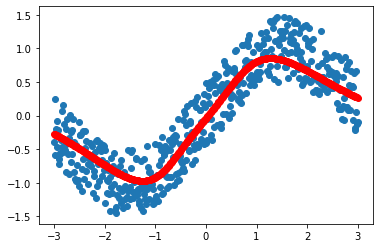

In [0]:
predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, 'ro')
plt.show()

ultimately displaying the model that was trained to fit our data . Now that we have an understanding of regression type examples we can finally move on to the most exciting section of this course where we start building our self-driving car. 